<ipython-input-1-108080a798f9>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M').mean()


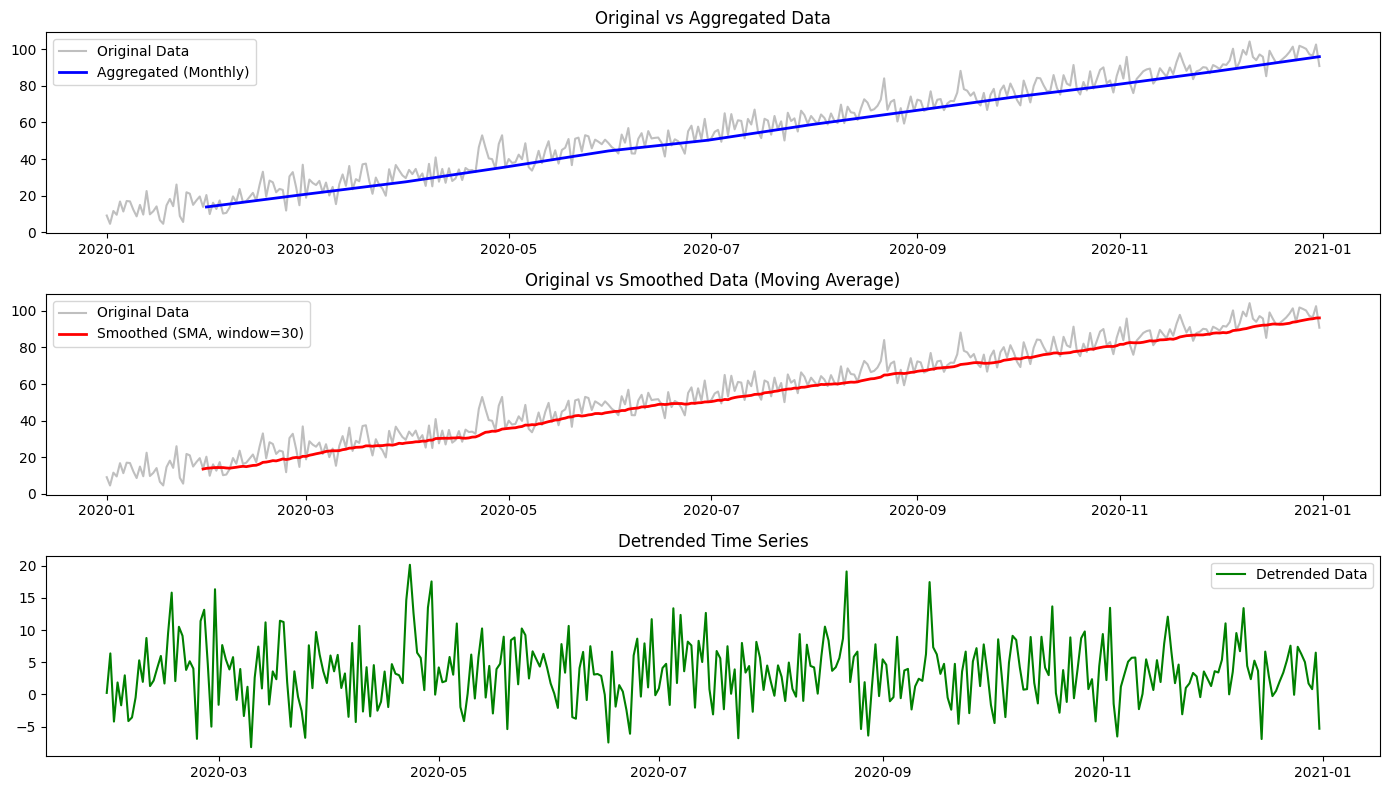

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

date_range = pd.date_range(start='2020-01-01', end='2020-12-31', freq='D')
data = np.random.randn(len(date_range)) * 5 + np.linspace(10, 100, len(date_range))
df = pd.DataFrame({'Date': date_range, 'Value': data})
df.set_index('Date', inplace=True)

monthly_data = df.resample('M').mean()

window_size = 30
smoothed_data = df['Value'].rolling(window=window_size).mean()

detrended_data = df['Value'] - smoothed_data

plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(df.index, df['Value'], label='Original Data', color='gray', alpha=0.5)
plt.plot(monthly_data.index, monthly_data['Value'], label='Aggregated (Monthly)', color='blue', linewidth=2)
plt.legend()
plt.title('Original vs Aggregated Data')

plt.subplot(3, 1, 2)
plt.plot(df.index, df['Value'], label='Original Data', color='gray', alpha=0.5)
plt.plot(smoothed_data.index, smoothed_data, label=f'Smoothed (SMA, window={window_size})', color='red', linewidth=2)
plt.legend()
plt.title('Original vs Smoothed Data (Moving Average)')

plt.subplot(3, 1, 3)
plt.plot(detrended_data.index, detrended_data, label='Detrended Data', color='green')
plt.legend()
plt.title('Detrended Time Series')

plt.tight_layout()
plt.show()
